In [47]:
# Importing Libraries
import sqlite3

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

In [48]:
#Loafing the database into dataframe
c = sqlite3.connect('database.sqlite')

# List all tables in the database
df = pd.read_sql_query("SELECT * FROM sqlite_master WHERE type='table'",c)

# Output dataframe
df

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [49]:
player_attr_df = pd.read_sql("SELECT * FROM Player_Attributes",c) # Input Code Here
player_attr_df.fillna(11, inplace=True)
#Display first 5 rows

In [50]:
player_attr_df.head(5)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [51]:
len(player_attr_df)

183978

In [52]:
player_attr_df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [53]:
x = player_attr_df[['gk_handling']].values 
y = player_attr_df[['gk_reflexes']].values

### Split the data into training and testing in 0.3 ratio (70% training, 30% testing)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

In [55]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(128784, 1) (55194, 1) (128784, 1) (55194, 1)


### Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train) 
print(lm.score(X_test, Y_test))

0.9342753939892032


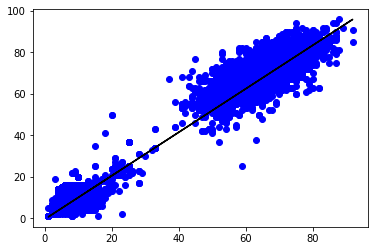

In [57]:
y_pred = lm.predict(X_test)
plt.scatter(X_test, Y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()
# Data scatter of predicted values

In [58]:
Y_predicted = lm.predict(X_test) # Input Code Here
rsquared = r2_score(Y_predicted, Y_test)
print("R2 Score: " + str(rsquared))

R2 Score: 0.9293650051144279


### Standar Scalar transformation 

In [59]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
sc = StandardScaler()

x = sc.fit_transform(x) # Input Code Here
y = sc.fit_transform(y) # Input Code Here

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

lm = LinearRegression()
lm.fit(X_train, Y_train) 
print(lm.score(X_test, Y_test))

0.9337446077054987


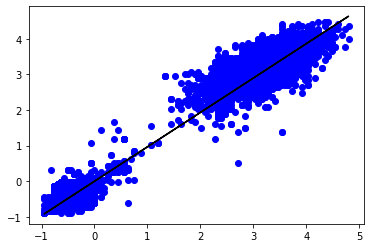

In [61]:
y_pred = lm.predict(X_test)
plt.scatter(X_test, Y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()
# Data scatter of predicted values

In [62]:
Y_predicted = lm.predict(X_test) # Input Code Here
rsquared = r2_score(Y_predicted, Y_test)
print("R2 Score: " + str(rsquared))

R2 Score: 0.928781356085286


In [63]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=5)
scores   

array([0.93292487, 0.93100319, 0.93453493, 0.93633306, 0.93421865])

### Cross-Validation

In [64]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=folds)
print(scores.mean())   

0.9338093939317818


In [74]:
def evaluate_model(Model, lambdas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for l in lambdas:
        # in sklearn, they refer to lambda as alpha, the name is different in different literature
        # Model will be either Lasso, Ridge or ElasticNet
        model = Model(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
        model.fit(X_train, Y_train)

        training_predictions = model.predict(X_train)
        training_mse = mean_squared_error(Y_train, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(X_test)
        testing_mse = mean_squared_error(Y_test, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

In [75]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

###  Lasso Regularizations 

In [66]:
# import lasso regression library
from sklearn.linear_model import Lasso

# using lasso to fit X_train, y_train with 10-fold cross-validation over alpha values from 0.1 to 0.9
for i in range (1,10):
    lasso = Lasso(alpha=i/10)
    scores = cross_val_score(lasso, X_train, Y_train, cv=10)
    print(i/10, ": ", scores.mean())

0.1 :  0.923737329196698
0.2 :  0.8935916704786845
0.3 :  0.843343567095755
0.4 :  0.77299301904791
0.5 :  0.6825400263351492
0.6 :  0.571984588957473
0.7 :  0.44132670691488085
0.8 :  0.29056638020737313
0.9 :  0.11970360883494972


In [76]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error  # we will use MSE for evaluation
import matplotlib.pyplot as plt

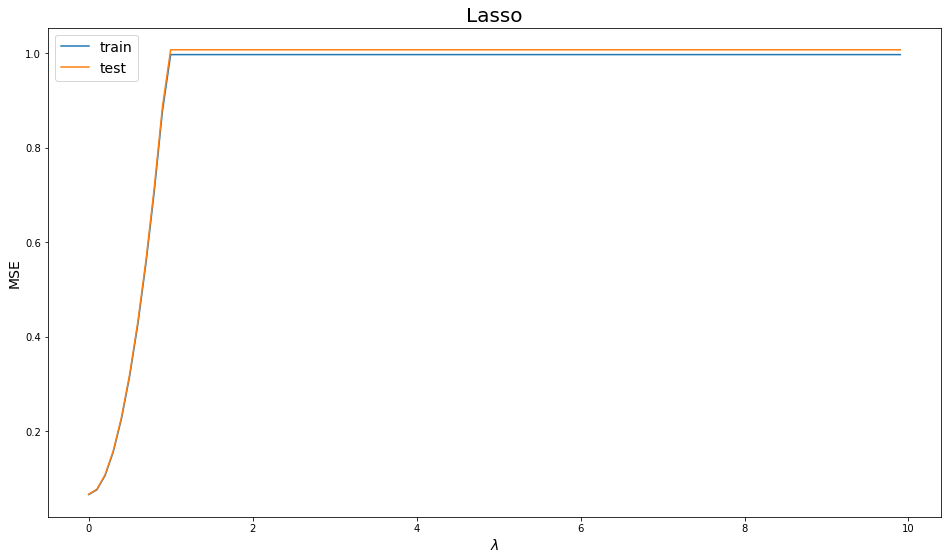

In [77]:

import warnings
warnings.filterwarnings('ignore')
# let's generate different values for lambda from 0 (no-regularization) and (10 too much regularization)
lambdas = np.arange(0, 10, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

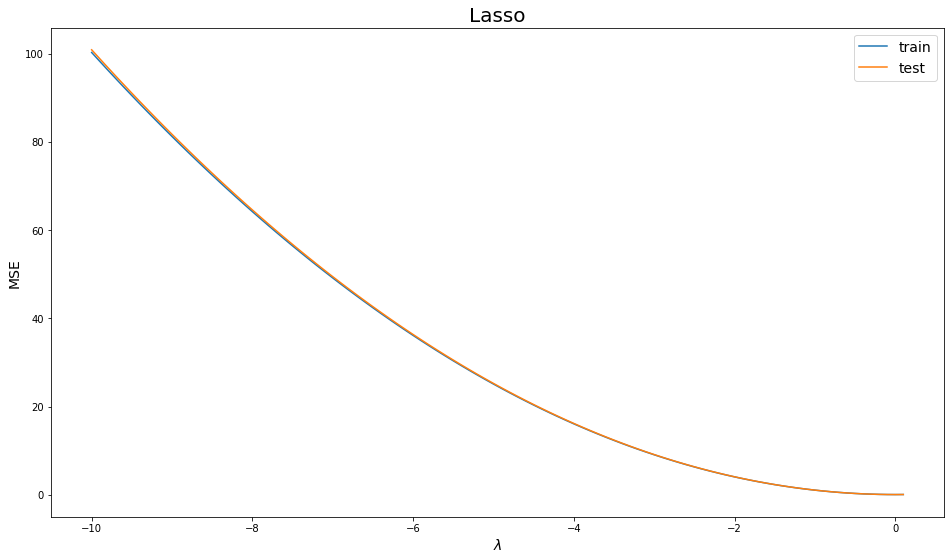

In [78]:
lambdas = np.arange(-10, 0.2, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

### Ridge Regularization

In [29]:
# import ridge regression library
from sklearn.linear_model import Ridge

# using ridge to fit X_train, y_train with 10-fold cross-validation over alpha values from 0.1 to 0.9
for i in range (1,10):
    ridge = Ridge(alpha=i/10)
    scores = cross_val_score(ridge, X_train, Y_train, cv=10)
    print(i/10, ": ", scores.mean())

0.1 :  0.9344291402583
0.2 :  0.9344291402989555
0.3 :  0.9344291403382494
0.4 :  0.9344291403761817
0.5 :  0.9344291404127528
0.6 :  0.9344291404479625
0.7 :  0.9344291404818105
0.8 :  0.9344291405142974
0.9 :  0.9344291405454225


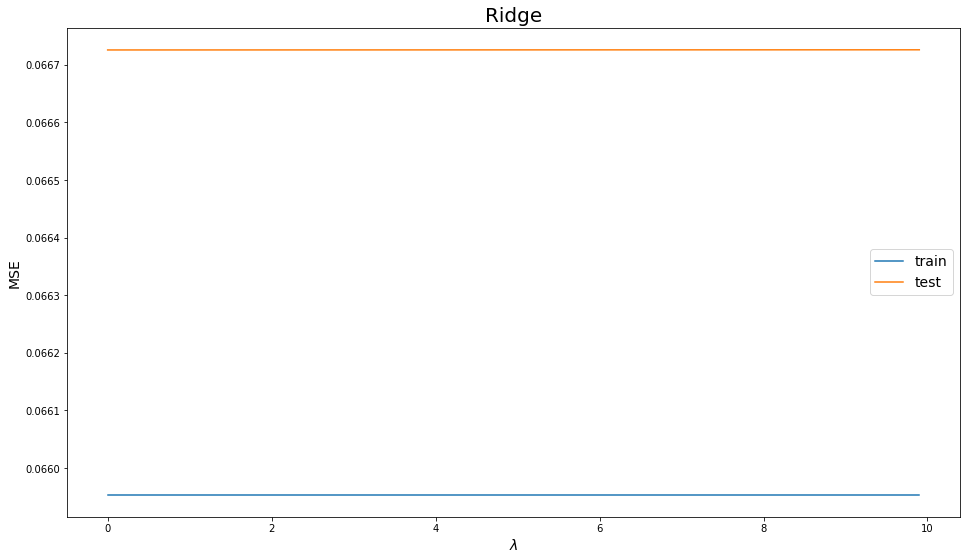

In [79]:
# let's generate different values for lambda from 0 (no-regularization) and (10 too much regularization)
lambdas = np.arange(0, 10, step=0.1)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")

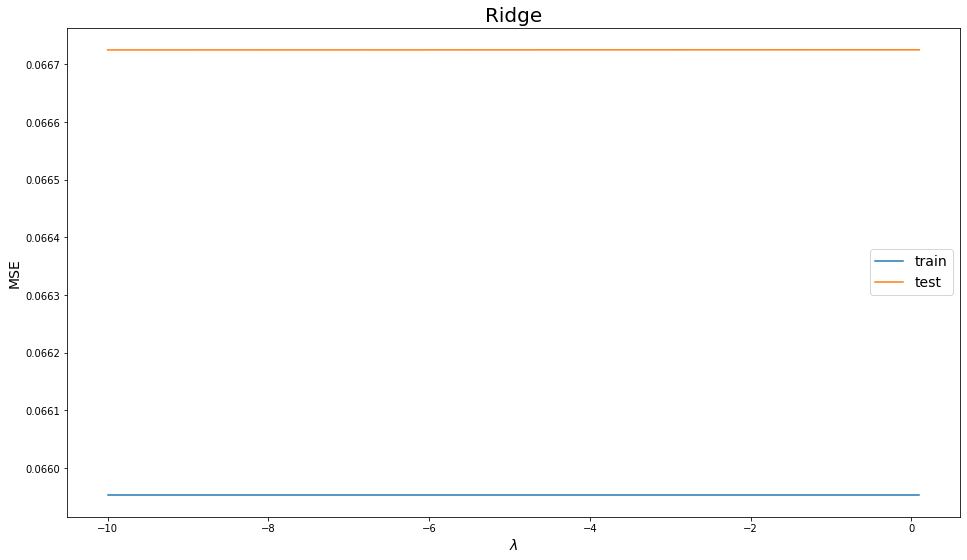

In [81]:
lambdas = np.arange(-10, 0.2, step=0.1)

ridge_train, ridge_test = evaluate_model(Ridge, lambdas)
plot_errors(lambdas, ridge_train, ridge_test, "Ridge")

In [82]:
!jupyter-nbconvert --to PDFviaHTML Assignment5_sharanbasav.ipynb

[NbConvertApp] Converting notebook Assignment5_sharanbasav.ipynb to PDFviaHTML
[NbConvertApp] Writing 459669 bytes to Assignment5_sharanbasav.pdf
